In [1]:
%load_ext autoreload
%autoreload 2

https://machinelearningmastery.com/develop-word-based-neural-language-models-python-keras/

In [2]:
import sys 
sys.path.append("/Users/julianganzabal/facultad/lab-ml/mllab-tools")
import numpy as np
from fnn_helper import PlotLosses

Using TensorFlow backend.


In [3]:
text_raw = open('poesia_completa.txt').read()

In [4]:
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text_raw])
encoded = tokenizer.texts_to_sequences([text_raw])[0]

In [5]:
# determine the vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 12559


In [6]:
# create word -> word sequences
sequences = list()
for i in range(1, len(encoded)):
    sequence = encoded[i-1:i+1]
    sequences.append(sequence)
print('Total Sequences: %d' % len(sequences))

Total Sequences: 83637


In [7]:
# split into X and y elements
sequences = np.array(sequences)
X, y = sequences[:,0],sequences[:,1]

In [8]:
from keras.utils import to_categorical
# one hot encode outputs
y = to_categorical(y, num_classes=vocab_size)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [10]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.callbacks import ModelCheckpoint 
# define model
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=1))
model.add(LSTM(50))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1, 10)             125590    
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                12200     
_________________________________________________________________
dense_1 (Dense)              (None, 12559)             640509    
Total params: 778,299
Trainable params: 778,299
Non-trainable params: 0
_________________________________________________________________
None


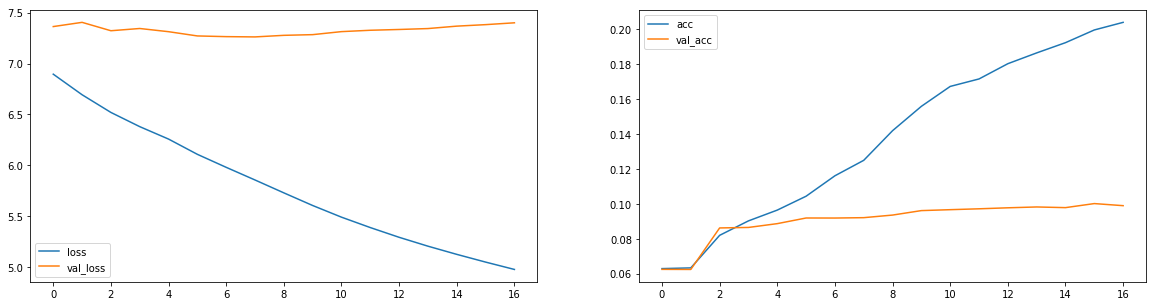

41818/41818 [==============================] - 138s - loss: 4.9747 - acc: 0.2039 - val_loss: 7.4008 - val_acc: 0.0990
Epoch 18/500
 6560/41818 [===>..........................] - ETA: 93s - loss: 4.8137 - acc: 0.2117

KeyboardInterrupt: 

In [39]:
checkpointer = ModelCheckpoint(filepath='poemas_2_first_model.hdf5', verbose=1, save_best_only=True)
# compile network
plot_losses = PlotLosses(plot_interval=1, evaluate_interval=None, x_val=X_test, y_val_categorical=y_test)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
model.fit(X_train, y_train, batch_size=32, epochs=500, verbose=1, validation_data=(X_test, y_test), callbacks=[checkpointer, plot_losses])

In [12]:
model.load_weights('poemas_2_first_model.hdf5')

In [15]:
# generate a sequence from the model
def generate_seq(model, tokenizer, seed_text, n_words):
    in_text, result = seed_text, seed_text
    # generate a fixed number of words
    for _ in range(n_words):
        # encode the text as integer
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        encoded = np.array(encoded)
        # predict a word in the vocabulary
        yhat = model.predict_classes(encoded, verbose=0)
        # map predicted word index to word
        out_word = ''
        for word, index in tokenizer.word_index.items():
            if index == yhat:
                out_word = word
                break
        # append to input
        in_text, result = out_word, result + ' ' + out_word
    return result

In [25]:
generate_seq(model, tokenizer, 'le', 50)

'le que el cielo de la luna y el cielo de la luna y el cielo de la luna y el cielo de la luna y el cielo de la luna y el cielo de la luna y el cielo de la luna y el cielo de la luna y el'